# Constraining subglacial processes from surface velocity observations using surrogate-based Bayesian inference
## Part 1 - Training an ensemble of neural networks

In this notebook, we will illustrate the process of using Bayesian Bootstrap Aggregation (BayesBag) to train an ensemble of neural networks.  In this case, each ensemble member is one possible surrogate for the coupled hydrology-ice dynamics model described in the paper, mapping from a vector of 8 parameters to a velocity field.  We begin by importing both the parameters and the associated velocity fields computed by the physics model, which will act as training data for the surrogate.

In [1]:
import pickle
import numpy as np
import re
#import utilities
import xarray as xr

thin = 5

o_file = "../data/validation/greenland_vel_mosaic250_v1_g1800m.nc"
o_xr = xr.open_dataset(o_file)

o_speed = o_xr.variables["velsurf_mag"].values[::thin,::thin]
o_speed_sigma = o_xr.variables["velsurf_mag_error"].values[::thin,::thin]

o_ny, o_nx = o_speed.shape
o_xr.close()

o_speeds = np.nan_to_num(o_speed, 0).reshape(-1, 1)
o_log_speeds = np.log10(o_speeds)
o_log_speeds[np.isneginf(o_log_speeds)] = 0

o_speeds_sigma = np.nan_to_num(o_speed_sigma, 0).reshape(-1, 1)

from glob import glob
s_files = glob("../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_*_0_50.nc")
nt = len(s_files)

# open first file to get the dimensions
vxr0 = xr.open_dataset(s_files[0])
speed = vxr0.variables["velsurf_mag"].values[:,::thin,::thin]
_, ny, nx = speed.shape
vxr0.close()

m_speeds = np.zeros((nt, ny * nx))

# Go through all files and don't forget to extract the experiment id
ids = []
for k, s_file in enumerate(s_files):
    print(f"Reading {s_file}")
    vxr = xr.open_dataset(s_file)
    ids.append(re.search("id_(.+?)_0", s_file).group(1))
    m_speeds[k, ::] = vxr.variables["velsurf_mag"].values[:,::thin,::thin].flatten()
    vxr.close()

# For comparison, we run the analysis for both u and log10(u)
m_speeds_mean = np.nanmean(m_speeds, axis=0)
m_speeds_anom = m_speeds - m_speeds_mean
m_speeds_anom = np.nan_to_num(m_speeds_anom, 0)

m_log_speeds = np.log10(np.nan_to_num(m_speeds, 0))
m_log_speeds[np.isneginf(m_log_speeds)] = 0
m_log_speeds_mean = np.nanmean(m_log_speeds, axis=0)
m_log_speeds_anom =  m_log_speeds - m_log_speeds_mean
m_log_speeds_anom[np.isneginf(m_log_speeds_anom)] = 0
m_log_speeds_anom = np.nan_to_num(m_log_speeds_anom, 0)

# Load velocity fields
#F_lin = pickle.load(open('data/F_prior.p','rb'))

# Load model parameters 
#X = pickle.load(open('data/X_prior.p','rb'))000

<ipython-input-1-d7d1bd03f0b8>:19: RuntimeWarning: divide by zero encountered in log10
  o_log_speeds = np.log10(o_speeds)


Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_586_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_596_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_51_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_854_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_41_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_844_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_9_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_798_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_788_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_995_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_174_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_985_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_164_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_659_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_862_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_946_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_956_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_494_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_484_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_555_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_545_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_278_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_300_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_268_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_310_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_887_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_82_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_897_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_525_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_535_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_208_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_370_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_218_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_360_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_643_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_653_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_936_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_926_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_782_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_3_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_792_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_486_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_114_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_629_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_751_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_639_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_741_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_437_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_427_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_262_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_272_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_21_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_824_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_31_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_834_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_690_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_233_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_223_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_466_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_476_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_678_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_700_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_668_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_710_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_155_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_145_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_70_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_875_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_60_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_865_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_321_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_249_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_331_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_574_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_564_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_398_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_388_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_186_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_967_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_196_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_977_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_78_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_905_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_68_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_672_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_229_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_351_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_239_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_341_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_504_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_514_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_566_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_576_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_333_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_323_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_778_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_600_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_768_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_416_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_406_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_608_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_770_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_618_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_760_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_125_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_135_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_147_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_157_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_712_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_702_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_474_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800m_v4_id_464_0_50.nc
Reading ../data/speeds_v2/velsurf_mag_gris_g1800

<ipython-input-1-d7d1bd03f0b8>:50: RuntimeWarning: divide by zero encountered in log10
  m_log_speeds = np.log10(np.nan_to_num(m_speeds, 0))


In [2]:
import pandas as pd
response_file = "log_speeds.csv"
df = pd.DataFrame(data=m_log_speeds, index=ids)
print(df.head())
df.to_csv(response_file, index_label="id")

     0      1      2      3      4      5      6      7      8      9      \
586    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
596    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
51     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
854    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  53494  53495  53496  53497  53498  53499  53500  53501  53502  53503  
586  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
596  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
51   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
854  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
41   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 53504 columns]


In [96]:
from pismemulator.utils import prepare_data
import pandas as pd
response_file = "log_speeds.csv"
samples_file = "../data/samples/velocity_calibration_samples_100.csv"
samples, response = prepare_data(samples_file, response_file)


Preparing sample ../data/samples/velocity_calibration_samples_100.csv and response log_speeds.csv
The following simulation ids are missing:
   [337, 595, 539, 542]


The velocity fields have some bad simulations in them, so we filter out circumstances in which the model never ran past 12 years, and in which the max velocity was greater than 100km/a.

In [97]:
p = response.max(axis=1)<5

F = response.values
X = samples.values

Finally, we log transform the velocity fields.

We will use pytorch to construct and train the neural networks.  To this end, we will move the physical model's parameters and (log-)speed fields to pytorch, and use the GPU if it's available.

In [98]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

n_samples = X.shape[0]

X = torch.from_numpy(X)
F = torch.from_numpy(F)
F[F<0] = 0

X = X.to(torch.float32)
F = F.to(torch.float32)

X = X.to(device)
F = F.to(device)

X_m = X.mean(axis=0)
X_s = X.std(axis=0)

#F_m = F.mean(axis=0)
#F_s = F.std(axis=0)

X = (X-X_m)/X_s
#F = (F-F_m)/(F_s + 1e-5)

#X_hat = torch.log10(X)

In [215]:
print(F.mean())

tensor(0.5800)


Part of our objective function is to weight by element area.  We will grab those values from a .vtu of an observed velocity field.

In [100]:
import pickle
import numpy as np
#u_obs = utilities.VData('./data/u_observed.vtu')
#point_area = torch.tensor(u_obs.get_point_area(),dtype=torch.float,device=device)
normed_area = torch.tensor(np.ones(F.shape[1]),device=device)
normed_area/=normed_area.sum()
print(normed_area)

tensor([1.8690e-05, 1.8690e-05, 1.8690e-05,  ..., 1.8690e-05, 1.8690e-05,
        1.8690e-05], dtype=torch.float64)


Next we need to define a few functions and classes.  First, we will create a function that extracts eigenglaciers and constructs the matrix $\hat{V}$, corresponding to the Dimensionality Reduction section.

In [101]:
def get_eigenglaciers(omegas,F,cutoff=0.999):
    F_mean = (F*omegas).sum(axis=0)
    F_bar = F - F_mean # Eq. 28
    Z = torch.diag(torch.sqrt(omegas.squeeze()*m))
    U,S,V = torch.svd_lowrank(Z@F_bar,q=100)
    lamda = S**2/(m) 
    #print(S.shape)

    #lamda, V = torch.eig(S,eigenvectors=True) # Eq. 26
    #lamda = lamda[:,0].squeeze()
    
    cutoff_index = torch.sum(torch.cumsum(lamda/lamda.sum(),0)<cutoff)
    lamda_truncated = lamda.detach()[:cutoff_index]
    V = V.detach()[:,:cutoff_index]
    V_hat = V @ torch.diag(torch.sqrt(lamda_truncated)) # A slight departure from the paper: Vhat is the
                                                        # eigenvectors scaled by the eigenvalue size.  This
                                                        # has the effect of allowing the outputs of the neural
                                                        # network to be O(1).  Otherwise, it doesn't make 
                                                        # any difference.
    return V_hat, F_bar, F_mean

Second, we define the architecture of the neural network to be used as a surrogate.  This corresponds to the architecture defined in Fig. 3.

In [102]:
import torch.nn as nn

class Emulator(nn.Module):
    def __init__(self,n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,V_hat,F_mean):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.l_1 = nn.Linear(n_parameters, n_hidden_1)
        self.norm_1 = nn.LayerNorm(n_hidden_1)
        self.dropout_1 = nn.Dropout(p=0.0)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.norm_2 = nn.LayerNorm(n_hidden_2)
        self.dropout_2 = nn.Dropout(p=0.5)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.norm_3 = nn.LayerNorm(n_hidden_3)
        self.dropout_3 = nn.Dropout(p=0.5)
        self.l_4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.norm_4 = nn.LayerNorm(n_hidden_3)
        self.dropout_4 = nn.Dropout(p=0.5)
        self.l_5 = nn.Linear(n_hidden_4, n_eigenglaciers)

        self.V_hat = torch.nn.Parameter(V_hat,requires_grad=False)
        self.F_mean = torch.nn.Parameter(F_mean,requires_grad=False)

    def forward(self, x, add_mean=False):
        # Pass the input tensor through each of our operations

        a_1 = self.l_1(x)
        a_1 = self.norm_1(a_1)
        a_1 = self.dropout_1(a_1)
        z_1 = torch.relu(a_1) 

        a_2 = self.l_2(z_1)
        a_2 = self.norm_2(a_2)
        a_2 = self.dropout_2(a_2)
        z_2 = torch.relu(a_2) + z_1

        a_3 = self.l_3(z_2)
        a_3 = self.norm_3(a_3)
        a_3 = self.dropout_3(a_3)
        z_3 = torch.relu(a_3) + z_2
        
        a_4 = self.l_4(z_3)
        a_4 = self.norm_3(a_4)
        a_4 = self.dropout_3(a_4)
        z_4 = torch.relu(a_4) + z_3
        
        z_5 = self.l_5(z_4)
        if add_mean:
            F_pred = z_5 @ self.V_hat.T + self.F_mean
        else:
            F_pred = z_5 @ self.V_hat.T

        return F_pred 

In [103]:
import torch.nn as nn

class EmulatorLearnableVhat(nn.Module):
    def __init__(self,n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,n_grid_points,F_mean):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.l_1 = nn.Linear(n_parameters, n_hidden_1)
        self.norm_1 = nn.LayerNorm(n_hidden_1)
        self.dropout_1 = nn.Dropout(p=0.0)
        self.l_2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.norm_2 = nn.LayerNorm(n_hidden_2)
        self.dropout_2 = nn.Dropout(p=0.5)
        self.l_3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.norm_3 = nn.LayerNorm(n_hidden_3)
        self.dropout_3 = nn.Dropout(p=0.5)
        self.l_4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.norm_4 = nn.LayerNorm(n_hidden_3)
        self.dropout_4 = nn.Dropout(p=0.5)
        self.l_5 = nn.Linear(n_hidden_4, n_eigenglaciers)
        self.V_hat = nn.Linear(n_eigenglaciers,n_grid_points,bias=False)
        
        self.dropout_5 = nn.Dropout(p=0.3)

        #self.V_hat = torch.nn.Parameter(V_hat,requires_grad=False)
        self.F_mean = torch.nn.Parameter(F_mean,requires_grad=False)

    def forward(self, x, add_mean=False):
        # Pass the input tensor through each of our operations

        a_1 = self.l_1(x)
        a_1 = self.norm_1(a_1)
        a_1 = self.dropout_1(a_1)
        z_1 = torch.relu(a_1) 

        a_2 = self.l_2(z_1)
        a_2 = self.norm_2(a_2)
        a_2 = self.dropout_2(a_2)
        z_2 = torch.relu(a_2) + z_1

        a_3 = self.l_3(z_2)
        a_3 = self.norm_3(a_3)
        a_3 = self.dropout_3(a_3)
        z_3 = torch.relu(a_3) + z_2
        
        a_4 = self.l_4(z_3)
        a_4 = self.norm_3(a_4)
        a_4 = self.dropout_4(a_4)
        z_4 = torch.relu(a_4) + z_3
        
        z_5 = self.l_5(z_4)
        z_5 = self.dropout_5(z_5)
        z_6 = self.V_hat(z_5)
        if add_mean:
            F_pred = z_6 + self.F_mean
        else:
            F_pred = z_6
        return F_pred 

Third, we create an optimization procedure that trains a model for a given set of instance weights ($\omega_d$) and training data.  Optimization is performed using mini-batch gradient descent.

In [104]:
from torch.utils.data import TensorDataset

def criterion_ae(F_pred,F_obs,omegas,area):
    instance_misfit = torch.sum(torch.abs((F_pred - F_obs))**2*area,axis=1)
    return torch.sum(instance_misfit*omegas.squeeze())

def train_surrogate(e,X_train,F_train,omegas,area,batch_size=128,epochs=3000,eta_0=0.01,k=1000.):
    
    omegas_0 = torch.ones_like(omegas)/len(omegas)
    training_data = TensorDataset(X_train,F_train,omegas)

    batch_size = 128
    train_loader = torch.utils.data.DataLoader(dataset=training_data,
                                               batch_size=batch_size, 
                                               shuffle=True)
    
    optimizer = torch.optim.Adam(e.parameters(),lr=eta_0,weight_decay=0.0)
    
    # Loop over the data
    for epoch in range(epochs):
        # Loop over each subset of data
        for param_group in optimizer.param_groups:
            param_group['lr'] = eta_0*(10**(-epoch/k))

        for x,f,o in train_loader:
            e.train()
            # Zero out the optimizer's gradient buffer
            optimizer.zero_grad()

            f_pred = e(x)

            # Compute the loss
            loss = criterion_ae(f_pred,f,o,area)

            # Use backpropagation to compute the derivative of the loss with respect to the parameters
            loss.backward()
        
            # Use the derivative information to update the parameters
            optimizer.step()
            
        e.eval()
        F_train_pred = e(X_train)
        # Make a prediction based on the model
        loss_train = criterion_ae(F_train_pred,F_train,omegas,area)
        # Make a prediction based on the model
        loss_test = criterion_ae(F_train_pred,F_train,omegas_0,area)

        # Print the epoch, the training loss, and the test set accuracy.
        if epoch%10==0:
            print(epoch,loss_train.item(),loss_test.item())

    

1.0023052380778994e-05 5.479148565452448e-06


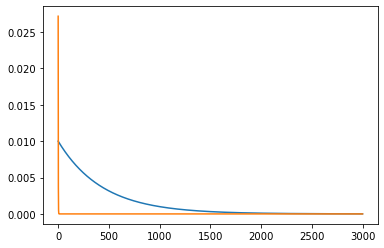

In [212]:
epochs=np.arange(3000)
eta_0=0.01
k=1000.
kx = 1
lr = eta_0*(10**(-epochs/k))
lre = eta_0 * kx * np.exp(1-epochs)
gamma = 1
eta_0 * gamma ** -1
plt.plot(epochs, lr)
plt.plot(epochs, lre)

gamma = 0.9975
my_lr = eta_0
for e in epochs:
    my_lr /= gamma ** -1
    # print(e, my_lr)
    
print(lr[-1], my_lr)

Here we put it all together: loop over the desired number of models, drawing random Bayesian bootstrap weights for each, training the surrogate, and saving the resulting models.  

In [105]:
from scipy.stats import dirichlet

torch.manual_seed(0)
np.random.seed(0)

n_parameters = X.shape[1]
n_hidden_1 = 128
n_hidden_2 = 128
n_hidden_3 = 128
n_hidden_4 = 128


In [139]:
n_models = 1 #To reproduce the paper, this should be 50
for model_index in range(n_models):
    omegas = torch.tensor(np.ones_like(dirichlet.rvs(np.ones(m)) * 0.1),dtype=torch.float,device=device).T
    print(omegas.shape)
   
    V_hat, F_bar, F_mean = get_eigenglaciers(omegas,F)

torch.Size([996, 1])


In [140]:
V_hat

tensor([], size=(53504, 0))

In [130]:
dirichlet.rvs(np.ones(m)).shape

(1, 996)

In [213]:
n_models = 1 #To reproduce the paper, this should be 50
for model_index in range(n_models):
    omegas = torch.tensor(dirichlet.rvs(np.ones(m)),dtype=torch.float,device=device).T
   
    V_hat, F_bar, F_mean = get_eigenglaciers(omegas,F)
    n_eigenglaciers = V_hat.shape[1]
    n_grid_points = V_hat.shape[0]

    e = Emulator(n_parameters,n_eigenglaciers,n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,V_hat,F_mean)
    e.to(device)
    
    train_surrogate(e,X,F_bar,omegas,normed_area,epochs=3000)
    torch.save(e.state_dict(),'emulator_ensemble_doug_test/emulator_{0:03d}.h5'.format(model_index))
#     e.eval()
#     fig, axs = plt.subplots(nrows=5, ncols=2, sharex="col", sharey="row", figsize=(10, 40))
#     for k in range(5):
#         idx = np.random.randint(X.shape[0])
#         X_scaled = X[idx, :] * X_s + X_m
#         F_pred = e(X_scaled, add_mean=True).detach().numpy().reshape(ny, nx)
#         F_val = (F[idx, :] + F_mean).detach().numpy().reshape(ny, nx)
#         corr = np.corrcoef(F_val.flatten(), F_pred.flatten())[0, 1]
#         axs[k, 0].imshow(F_val, origin="lower", vmin=0, vmax=3, cmap="viridis")
#         axs[k, 0].text(110, 25, f"Pearson r={corr:.3f}", c="white")
#         axs[k, 1].imshow(F_pred, origin="lower", vmin=0, vmax=3, cmap="viridis")
#         axs[k, 1].text(
#             120,
#             25,
#             "SIAE: {0:.2f}\nSSAN: {1:.2f}\nPPQ : {2:.2f}\nTEFO: {3:.2f}\nPHIM: {4:.2f}\nPHIX: {5:.2f}\nZMIN: {6:.2f}\nZMAX: {7:.2f}".format(
#                  *X_scaled
#             ),
#             c="white",
#             )
#     fig.subplots_adjust(wspace=0, hspace=0)
#     fig.savefig(f"speed_val_{model_index}.png")



0 4.343880964467553 4.395157023661367
10 3.698130394263804 3.7891754413065217
20 3.051525148658224 3.3311385136316503
30 1.4572604875420043 2.158279647528072
40 0.8471302147572963 1.1590132575815928
50 0.2561861456449444 0.4234235998844511
60 0.2282021282661772 0.3419841578448535
70 0.4366626212450847 0.5441807166483428
80 0.3164379107231065 0.3962780515220047
90 0.05993677671237939 0.09344260653736407
100 0.03593422456180903 0.07438075778890962
110 0.039395416043891796 0.058313969464380055
120 0.019691061237765817 0.03170523988327462
130 0.018333031542693307 0.03879007621176206
140 0.05504228386092367 0.0713892851256664
150 0.024542762033547008 0.036414048703250386
160 0.022773694348252018 0.03778552216713679
170 0.014994573771539593 0.02809556782642131
180 0.021813397350095267 0.03326088675725306
190 0.014627827806489562 0.022404475607450736
200 0.01368710390603546 0.020675075152327853
210 0.023817840845412528 0.03105318673844957
220 0.05520990351000988 0.060679194589119106
230 0.036

1800 0.006294851584055325 0.007594633123036485
1810 0.006718466127257903 0.00806114901939891
1820 0.0064078048413795 0.0076353875878920445
1830 0.006073992092534245 0.007215036734378544
1840 0.00598138458271415 0.007233511405263623
1850 0.006648767787495182 0.007452889044657591
1860 0.006220205564310435 0.007177148715947237
1870 0.005713051973003519 0.006642959687942672
1880 0.00802997361435323 0.00977434493070233
1890 0.0062838555109149315 0.007577434625681304
1900 0.005744862321877391 0.0067582185767747814
1910 0.006439037134430255 0.007435199220240546
1920 0.005810572633248616 0.006863439971537323
1930 0.005841319973216318 0.006892566413714681
1940 0.006754985064959584 0.008265121052371049
1950 0.005828568160446254 0.006889890561110373
1960 0.005939778241767153 0.007105611840201425
1970 0.005939840069243889 0.0070690938971364565
1980 0.006651101170841662 0.007684743558262486
1990 0.006641464377125572 0.0078009390328574344
2000 0.005686830981186437 0.006613218543463235
2010 0.0062682

In [91]:
F_pred.shape

(304, 176)

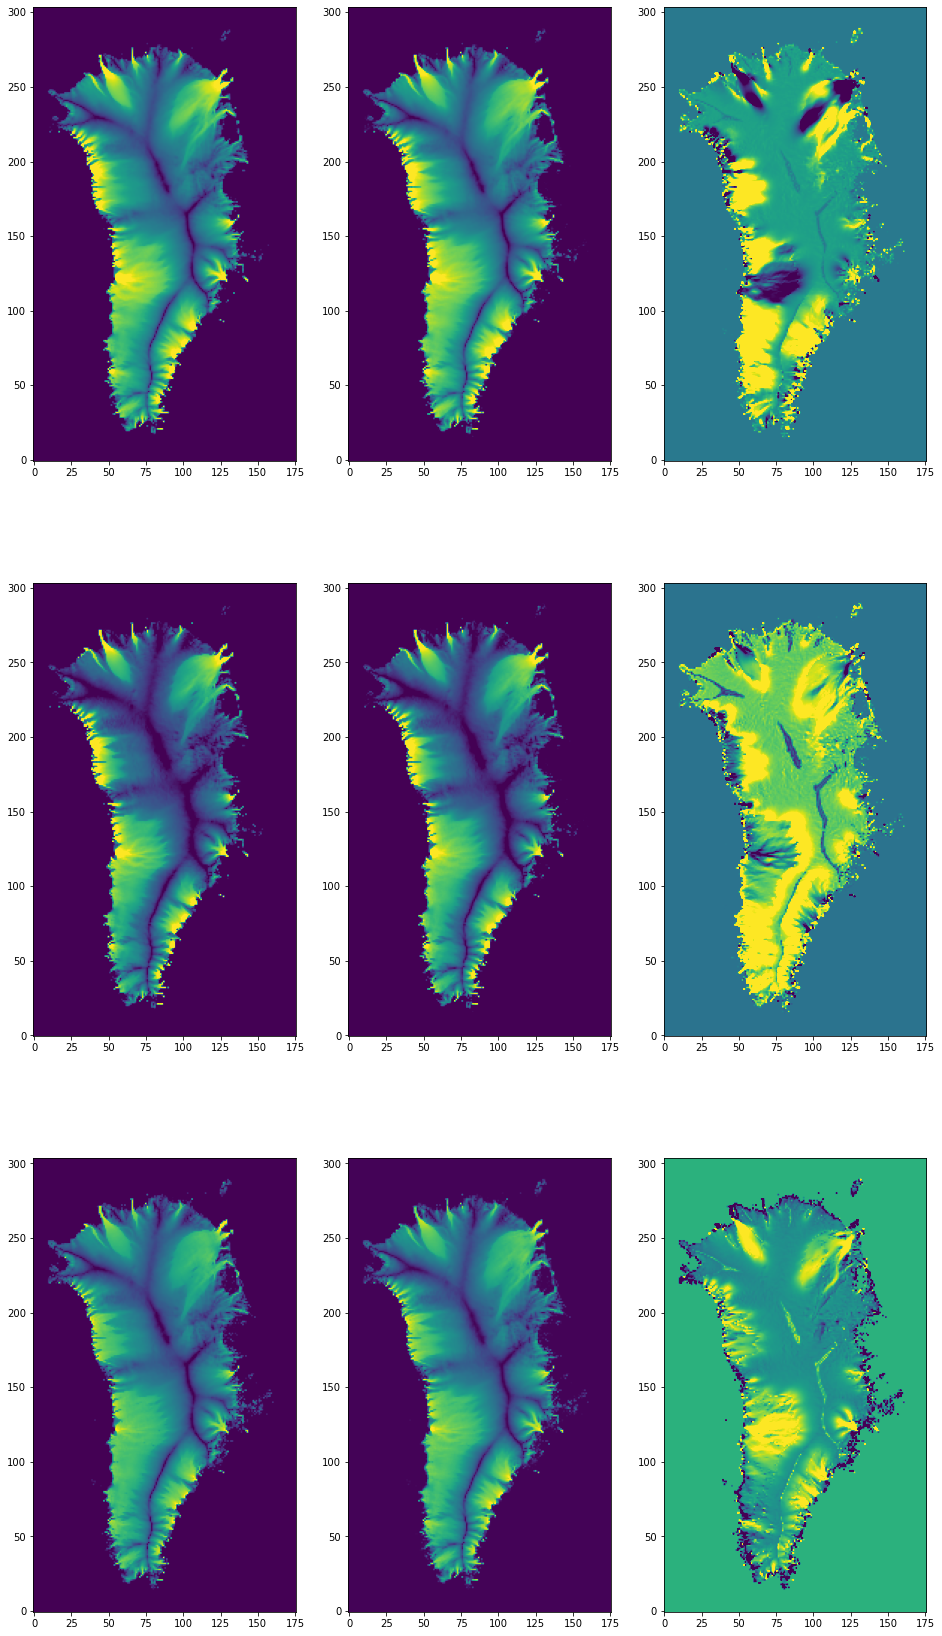

In [15]:
import matplotlib.pyplot as plt
F_pred = e(X,add_mean=True)
F_orig = F
fig,axs = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(16,30)
inds = np.random.randint(0,m,3)
axs[0,0].imshow(F_orig[inds[0],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[0,1].imshow(F_pred[inds[0],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[0,2].imshow((F_pred[inds[0],:].detach().cpu().numpy() - F_orig[inds[0],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[1,0].imshow(F_orig[inds[1],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[1,1].imshow(F_pred[inds[1],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[1,2].imshow((F_pred[inds[1],:].detach().cpu().numpy() - F_orig[inds[1],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[2,0].imshow(F_orig[inds[2],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[2,1].imshow(F_pred[inds[2],:].detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
axs[2,2].imshow((F_pred[inds[2],:].detach().cpu().numpy() - F_orig[inds[2],:].detach().cpu().numpy()).reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)


In [23]:
plt.imshow(e.V_hat.weight.detach().cpu().numpy()[:,19].reshape(ny,nx),origin='lower',vmin=-0.5,vmax=0.5)
plt.colorbar()

AttributeError: 'Parameter' object has no attribute 'weight'

In [69]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR


In [71]:
ExponentialLR?

## Part 2 - MCMC over the ensemble
Now that a number of neural network surrogates have been trained on random subsets of high-fidelity model runs, we will perform Markov Chain Monte Carlo sampling over each of these surrogates.  The correct parameter distribution for the high-fidelity model will be approximated by concatenating the Markov Chains over all of the surrogates.

In [16]:
import pickle
import numpy as np
import torch


Read in the models trained above.

In [17]:
models = []
n_models = 5 #To reproduce the paper, this should be 50

for i in range(n_models):
    state_dict = torch.load('emulator_ensemble_doug/emulator_{0:03d}.h5'.format(i))
    e = Emulator(state_dict['l_1.weight'].shape[1],state_dict['V_hat'].shape[1],n_hidden_1,n_hidden_2,n_hidden_3,n_hidden_4,state_dict['V_hat'],state_dict['F_mean'])
    e.load_state_dict(state_dict)
    e.to(device)
    e.eval()
    models.append(e)

Read in some relevant training data and ancillary values.  Convert observed velocities to speeds.

In [18]:
#u_obs = utilities.VData('./data/u_observed.vtu')
#v_obs = utilities.VData('./data/v_observed.vtu')
#H_obs = utilities.VData('./data/H_observed.vtu')

#H = torch.tensor(H_obs.u)
#H = H.to(torch.float32).to(device)

U_obs = torch.tensor(np.nan_to_num(o_speed.ravel()))#((np.sqrt(u_obs.u**2 + v_obs.u**2))))
U_obs = U_obs.to(torch.float32).to(device)

Define the likelihood model, which requires a parameterization of observational uncertainty.

In [20]:
from scipy.spatial.distance import pdist, squareform
#D = torch.tensor(squareform(pdist(u_obs.x)),dtype=torch.float32,device=device)

sigma2 = 10**2
#sigma_flow2 = 10**2
#alpha_cov = 1

l_model = 1e4#4*torch.sqrt(H.unsqueeze(1) @ H.unsqueeze(0))
#Sigma_obs = sigma2*torch.eye(U_obs.shape[0]*U_obs.shape[1],device=device)
#Sigma_flow = sigma_flow2*(1 + D**2/(2*alpha_cov*l_model**2))**-alpha_cov
#Sigma = Sigma_obs# + Sigma_flow

Construct the precision matrix (the inverse of equation 50)

In [21]:
rho = 1./(1e4**2)
point_area = (1800 * thin) ** 2
K = point_area*rho

Tau = K * 1./sigma2 * K

In [22]:
sigma_hat = np.sqrt(sigma2/K**2)

Construct the Beta prior distribution.  

In [83]:
from scipy.stats import beta
alpha_b = 3.0
beta_b = 3.0

X_min = X.cpu().numpy().min(axis=0)-1e-3
X_max = X.cpu().numpy().max(axis=0)+1e-3

X_prior = beta.rvs(alpha_b,beta_b,size=(10000,X.shape[1]))*(X_max - X_min) + X_min

X_min = torch.tensor(X_min,dtype=torch.float32,device=device)
X_max = torch.tensor(X_max,dtype=torch.float32,device=device)

In [24]:
X

tensor([[-0.9518, -1.3720,  0.0666,  ...,  1.4342, -1.5753,  1.3891],
        [ 0.0195, -1.3720,  0.0666,  ...,  1.4342, -1.5753,  1.3891],
        [-0.9518, -1.4668,  0.0666,  ...,  1.4342, -1.5753,  1.3891],
        ...,
        [-0.1137,  0.3300,  0.1977,  ...,  0.8107, -0.0035, -1.4994],
        [-0.1137,  0.3300,  0.1977,  ...,  0.8107, -1.1946, -0.2974],
        [ 0.8306,  0.5400,  0.9929,  ...,  1.3311, -0.0035, -0.2974]])

This function returns a value that is proportional to the negative log-posterior distribution (The summands of equation 53).  

In [25]:
alpha = 0.01
from scipy.special import gamma
nu = 1.
def V(X):
    U_pred = 10**m(X,add_mean=True)
    #print(U_pred.min())
    r = (U_pred - U_obs)
    X_bar = (X - X_min)/(X_max - X_min)

    #L1 = -0.5*Tau*r @ r
    #L1 = -(1 + r.shape[0])/2.*torch.log(1 + r@r*Tau)
    #L1 = torch.sum(-np.log(np.sqrt(np.pi*2)*sigma_hat) - 1./2.*(r/sigma_hat)**2)
    L1 = torch.sum(np.log(gamma((nu+1)/2.)) - np.log(gamma(nu/2.)) - np.log(np.sqrt(np.pi*nu)*sigma_hat) - (nu+1)/2.*torch.log(1 + 1./nu*(r/sigma_hat)**2))
    L2 = torch.sum((alpha_b-1)*torch.log(X_bar) + (beta_b-1)*torch.log(1-X_bar)) 

    #print(L1,L2)
    return -(alpha*L1 + L2)

In [26]:
m = models[2]
X0 = torch.tensor(X_prior.mean(axis=0),dtype=torch.float,device=device)
print(X0)

tensor([ 0.0179,  0.0365, -0.0118,  0.0373, -0.0039,  0.0149,  0.0063,  0.0110])


We use the Metropolis-adjusted Langevin Algorithm to sample from the posterior distribution, which benefits from the availability of gradient and Hessian information.  Here, we compute these quantities (and some helpful additional ones) using automatic differentiation in pytorch.

In [27]:
def get_log_like_gradient_and_hessian(V,X,eps=1e-2,compute_hessian=False):
    log_pi = V(X)
    if compute_hessian:
        g = torch.autograd.grad(log_pi,X,retain_graph=True,create_graph=True)[0]
        H = torch.stack([torch.autograd.grad(e,X,retain_graph=True)[0] for e in g])
        lamda,Q = torch.eig(H,eigenvectors=True)
        lamda_prime = torch.sqrt(lamda[:,0]**2 + eps)
        lamda_prime_inv = 1./torch.sqrt(lamda[:,0]**2 + eps)
        H = Q @ torch.diag(lamda_prime) @ Q.T
        Hinv = Q @ torch.diag(lamda_prime_inv) @ Q.T
        log_det_Hinv = torch.sum(torch.log(lamda_prime_inv))
        return log_pi,g,H,Hinv,log_det_Hinv
    else: 
        return log_pi

We initialize the sampler by first finding the Maximum A Posteriori parameter value, or MAP point.  We find the MAP point using gradient descent paired with a simple line search.

In [28]:
def find_MAP(X,n_iters=50,print_interval=10):
    print('***********************************************')
    print('***********************************************')
    print('Finding MAP point')
    print('***********************************************')
    print('***********************************************')
    # Line search distances
    alphas = np.logspace(-4,0,11)
    # Find MAP point
    for i in range(n_iters):
        log_pi,g,H,Hinv,log_det_Hinv = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        p = Hinv @ -g
        alpha_index = np.nanargmin([get_log_like_gradient_and_hessian(V,X + alpha*p,compute_hessian=False).detach().cpu().numpy() for alpha in alphas])
        mu = X + alphas[alpha_index] * p 
        X.data = mu.data
        if i%print_interval==0:
            print('===============================================')
            print('iter: {0:d}, ln(P): {1:6.1f}, curr. m: {2:4.4f},{3:4.2f},{4:4.2f},{5:4.2f},{6:4.2f},{7:4.2f},{8:4.2f},{9:4.2f}'.format(i,log_pi,*X.data.cpu().numpy()))
            print('===============================================')
    return X

With a good initial guess for the sampler discovered, we now implement the MALA algorithm.  

In [29]:
def draw_sample(mu,cov,eps=1e-10):
    L = torch.cholesky(cov + eps*torch.eye(cov.shape[0],device=device))
    return mu + L @ torch.randn(L.shape[0],device=device)

def get_proposal_likelihood(Y,mu,inverse_cov,log_det_cov):
    return -0.5*log_det_cov - 0.5*(Y - mu) @ inverse_cov @ (Y-mu)

def MALA_step(X,h,local_data=None):
    if local_data is not None:
        pass  
    else:
        local_data = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        
    log_pi,g,H,Hinv,log_det_Hinv = local_data
    
    X_ = draw_sample(X,2*h*Hinv).detach()
    X_.requires_grad=True
    
    log_pi_ = get_log_like_gradient_and_hessian(V,X_,compute_hessian=False)

    logq = get_proposal_likelihood(X_,X,H/(2*h),log_det_Hinv)
    logq_ = get_proposal_likelihood(X,X_,H/(2*h),log_det_Hinv)

    log_alpha = (-log_pi_ + logq_ + log_pi - logq)
    alpha = torch.exp(min(log_alpha,torch.tensor([0.],device=device)))
    u = torch.rand(1,device=device)
    if u <= alpha and log_alpha!=np.inf:
        X.data = X_.data
        local_data = get_log_like_gradient_and_hessian(V,X,compute_hessian=True)
        s = 1
    else:
        s = 0
    return X,local_data,s

def MALA(X,n_iters=10001,h=0.1,h_max=1.0,acc_target=0.25,k=0.01,beta=0.99,sample_path='./samples/',model_index=0,save_interval=1000,print_interval=50):
    print('***********************************************')
    print('***********************************************')
    print('Running Metropolis-Adjusted Langevin Algorithm for model index {0}'.format(model_index))
    print('***********************************************')
    print('***********************************************')
    local_data = None
    vars = []
    acc = acc_target
    for i in range(n_iters):
        X,local_data,s = MALA_step(X,h,local_data=local_data)
        vars.append(X.detach())
        acc = beta*acc + (1-beta)*s
        h = min(h*(1+k*np.sign(acc - acc_target)),h_max)
        if i%print_interval==0:
            print('===============================================')
            print('sample: {0:d}, acc. rate: {1:4.2f}, log(P): {2:6.1f}'.format(i,acc,local_data[0].item()))
            print('curr. m: {0:4.4f},{1:4.2f},{2:4.2f},{3:4.2f},{4:4.2f},{5:4.2f},{6:4.2f},{7:4.2f}'.format(*X.data.cpu().numpy()))
            print('===============================================')
          
        if i%save_interval==0:
            print('///////////////////////////////////////////////')
            print('Saving samples for model {0:03d}'.format(model_index))
            print('///////////////////////////////////////////////')
            X_posterior = torch.stack(vars).cpu().numpy()
            np.save(open(sample_path+'X_posterior_model_{0:03d}.npy'.format(model_index),'wb'),X_posterior)
    X_posterior = torch.stack(vars).cpu().numpy()
    return X_posterior       

In [30]:
m = models[0]
X_0 = torch.tensor(X_prior.mean(axis=0),requires_grad=True,dtype=torch.float,device=device)
X_0 = find_MAP(X_0,n_iters=50)

***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 2186.8, curr. m: 0.0188,0.05,-0.04,0.03,0.00,0.00,0.01,0.01
iter: 10, ln(P): 2182.7, curr. m: 0.0093,0.08,-0.11,0.01,0.01,-0.03,0.00,0.01
iter: 20, ln(P): 2182.7, curr. m: 0.0096,0.08,-0.11,0.01,0.01,-0.03,0.01,0.01
iter: 30, ln(P): 2182.8, curr. m: 0.0101,0.08,-0.11,0.00,0.01,-0.03,0.01,0.01
iter: 40, ln(P): 2182.7, curr. m: 0.0104,0.08,-0.11,0.00,0.01,-0.03,0.01,0.01


We now run the MAP/MALA procedure for each surrogate in the bootstrapped ensemble, and save the resulting posterior distributions.

In [31]:
torch.manual_seed(0)
np.random.seed(0)
for j,m in enumerate(models):
    X_0 = torch.tensor(X_prior.mean(axis=0),requires_grad=True,dtype=torch.float,device=device)
    X_0 = find_MAP(X_0,n_iters=50)
    # To reproduce the paper, n_iters should be 10^5
    X_posterior = MALA(X_0,n_iters=10000,model_index=j,sample_path="./posterior_samples_doug/", save_interval=1000,print_interval=100)

***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 2186.8, curr. m: 0.0188,0.05,-0.04,0.03,0.00,0.00,0.01,0.01
iter: 10, ln(P): 2182.7, curr. m: 0.0093,0.08,-0.11,0.01,0.01,-0.03,0.00,0.01
iter: 20, ln(P): 2182.7, curr. m: 0.0096,0.08,-0.11,0.01,0.01,-0.03,0.01,0.01
iter: 30, ln(P): 2182.8, curr. m: 0.0101,0.08,-0.11,0.00,0.01,-0.03,0.01,0.01
iter: 40, ln(P): 2182.7, curr. m: 0.0104,0.08,-0.11,0.00,0.01,-0.03,0.01,0.01
***********************************************
***********************************************
Running Metropolis-Adjusted Langevin Algorithm for model index 0
***********************************************
***********************************************
sample: 0, acc. rate: 0.25, log(P): 2182.8
curr. m: 0.0107,0.08,-0.11,0.00,0.01,-0.03,0.01,0.01
///////////////////////////////////////////////
S

sample: 3300, acc. rate: 0.24, log(P): 2170.6
curr. m: 0.2867,0.16,-0.74,-0.26,0.33,0.26,-0.29,0.22
sample: 3400, acc. rate: 0.31, log(P): 2172.8
curr. m: 0.8352,0.55,-0.64,-0.63,0.50,0.50,-0.05,-0.22
sample: 3500, acc. rate: 0.19, log(P): 2169.6
curr. m: 0.4318,0.32,-0.57,-0.50,0.53,0.19,-0.04,-0.16
sample: 3600, acc. rate: 0.26, log(P): 2174.8
curr. m: 0.4206,0.14,-0.53,-0.44,0.46,0.11,0.11,-0.05
sample: 3700, acc. rate: 0.22, log(P): 2169.1
curr. m: 0.4219,0.17,-0.08,-0.64,0.32,0.15,0.11,-0.01
sample: 3800, acc. rate: 0.19, log(P): 2171.8
curr. m: 0.3910,0.51,-0.02,-0.70,0.05,0.12,-0.07,-0.05
sample: 3900, acc. rate: 0.23, log(P): 2171.9
curr. m: 0.6473,1.13,-0.41,-0.54,-0.09,-0.40,0.07,0.25
sample: 4000, acc. rate: 0.28, log(P): 2172.0
curr. m: 0.6876,0.86,-0.53,-0.30,0.15,-0.00,-0.04,0.31
///////////////////////////////////////////////
Saving samples for model 000
///////////////////////////////////////////////
sample: 4100, acc. rate: 0.28, log(P): 2174.3
curr. m: 0.6557,0.41,-1.

sample: 7300, acc. rate: 0.44, log(P): 2172.7
curr. m: 0.0828,0.19,-0.95,-0.30,1.32,0.31,-0.23,-0.57
sample: 7400, acc. rate: 0.26, log(P): 2172.1
curr. m: 0.0606,0.46,-0.21,-0.21,0.36,-0.38,-0.17,-0.47
sample: 7500, acc. rate: 0.15, log(P): 2172.7
curr. m: 0.4366,0.40,-0.44,-0.05,0.55,-0.76,-0.02,-0.34
sample: 7600, acc. rate: 0.26, log(P): 2171.2
curr. m: 0.2197,0.17,-0.25,-0.31,0.21,-0.08,-0.17,-0.43
sample: 7700, acc. rate: 0.25, log(P): 2176.7
curr. m: -0.1593,0.82,-0.18,-0.23,0.68,-0.01,-0.54,-0.30
sample: 7800, acc. rate: 0.28, log(P): 2175.9
curr. m: -0.0710,0.31,0.86,0.21,0.18,-0.32,-0.36,-0.10
sample: 7900, acc. rate: 0.27, log(P): 2176.7
curr. m: -0.3134,0.67,-0.28,0.22,-0.22,-0.87,-0.35,0.92
sample: 8000, acc. rate: 0.25, log(P): 2171.4
curr. m: 0.0429,0.25,-0.79,-0.17,0.19,-0.45,-0.02,0.33
///////////////////////////////////////////////
Saving samples for model 000
///////////////////////////////////////////////
sample: 8100, acc. rate: 0.10, log(P): 2170.9
curr. m: 0.1409

sample: 600, acc. rate: 0.24, log(P): 2171.8
curr. m: 0.1159,1.13,-1.16,0.47,0.37,0.29,-0.59,0.55
sample: 700, acc. rate: 0.17, log(P): 2172.3
curr. m: 0.4739,0.68,-1.26,0.02,-0.14,-0.12,-0.00,0.31
sample: 800, acc. rate: 0.35, log(P): 2172.3
curr. m: 0.3205,0.46,-1.27,-0.54,0.91,0.07,-0.36,-0.10
sample: 900, acc. rate: 0.45, log(P): 2174.8
curr. m: -0.1763,0.22,-1.16,0.04,-0.03,-0.06,-0.74,0.34
sample: 1000, acc. rate: 0.27, log(P): 2170.9
curr. m: 0.3670,0.69,-1.30,-0.10,0.44,0.04,-0.02,0.22
///////////////////////////////////////////////
Saving samples for model 001
///////////////////////////////////////////////
sample: 1100, acc. rate: 0.23, log(P): 2179.8
curr. m: 0.1929,1.60,-1.12,1.48,0.12,0.51,-0.65,1.37
sample: 1200, acc. rate: 0.28, log(P): 2177.6
curr. m: -0.7782,1.34,-0.20,1.03,-0.00,0.79,-1.24,1.31
sample: 1300, acc. rate: 0.19, log(P): 2175.1
curr. m: 0.3272,1.03,-1.58,0.60,0.28,-1.23,0.26,0.89
sample: 1400, acc. rate: 0.19, log(P): 2175.2
curr. m: 0.0599,0.51,-1.29,1.00

sample: 4600, acc. rate: 0.19, log(P): 2170.1
curr. m: 0.4739,0.40,-1.39,-0.10,0.03,-0.69,0.10,0.35
sample: 4700, acc. rate: 0.13, log(P): 2170.6
curr. m: 0.3879,0.41,-1.19,-0.37,0.35,-0.52,-0.11,0.12
sample: 4800, acc. rate: 0.25, log(P): 2172.6
curr. m: 0.5252,0.19,-1.57,-0.33,0.53,-0.95,0.30,0.06
sample: 4900, acc. rate: 0.24, log(P): 2174.5
curr. m: 0.4621,0.23,-1.65,-0.36,0.53,-1.34,0.36,0.22
sample: 5000, acc. rate: 0.39, log(P): 2176.5
curr. m: 0.2695,0.43,-1.23,0.10,-0.66,-1.34,-0.14,0.67
///////////////////////////////////////////////
Saving samples for model 001
///////////////////////////////////////////////
sample: 5100, acc. rate: 0.33, log(P): 2172.0
curr. m: 0.6054,0.52,-1.55,-0.12,0.58,-0.84,0.27,0.22
sample: 5200, acc. rate: 0.25, log(P): 2171.9
curr. m: 0.4254,0.54,-1.29,-0.18,-0.12,-1.00,0.00,0.30
sample: 5300, acc. rate: 0.14, log(P): 2170.9
curr. m: 0.5313,0.57,-1.35,0.28,-0.36,-0.87,0.11,0.64
sample: 5400, acc. rate: 0.34, log(P): 2174.3
curr. m: 0.0013,0.48,-1.41

sample: 8600, acc. rate: 0.32, log(P): 2173.4
curr. m: 0.2478,0.58,-0.65,-0.42,0.50,0.44,-0.83,-0.44
sample: 8700, acc. rate: 0.20, log(P): 2171.4
curr. m: 0.2432,0.50,-0.87,-0.23,-0.52,0.10,-0.56,-0.31
sample: 8800, acc. rate: 0.29, log(P): 2173.2
curr. m: 0.2856,0.29,-0.77,-0.47,-0.02,1.28,-0.40,-0.40
sample: 8900, acc. rate: 0.24, log(P): 2173.3
curr. m: 0.4798,0.57,-0.93,-0.52,0.74,1.01,-0.25,-0.23
sample: 9000, acc. rate: 0.26, log(P): 2170.2
curr. m: 0.4963,0.45,-1.33,-0.06,0.07,-0.32,0.19,0.35
///////////////////////////////////////////////
Saving samples for model 001
///////////////////////////////////////////////
sample: 9100, acc. rate: 0.29, log(P): 2173.4
curr. m: 0.0288,0.39,-1.01,-0.00,0.43,-0.49,0.09,-0.00
sample: 9200, acc. rate: 0.22, log(P): 2172.7
curr. m: 0.2705,0.22,-1.29,-0.19,0.13,-0.37,0.07,0.62
sample: 9300, acc. rate: 0.24, log(P): 2169.9
curr. m: 0.2291,0.52,-1.02,-0.40,0.38,0.55,-0.29,-0.14
sample: 9400, acc. rate: 0.33, log(P): 2174.4
curr. m: -0.0216,1.05

sample: 1900, acc. rate: 0.24, log(P): 2170.3
curr. m: 0.6446,0.62,-1.01,0.25,0.48,0.41,0.38,-0.28
sample: 2000, acc. rate: 0.22, log(P): 2167.3
curr. m: 0.5405,0.26,-0.66,-0.09,-0.03,-0.32,0.08,-0.18
///////////////////////////////////////////////
Saving samples for model 002
///////////////////////////////////////////////
sample: 2100, acc. rate: 0.16, log(P): 2171.9
curr. m: 0.4122,0.21,-0.76,-0.20,-0.21,-0.55,-0.14,0.07
sample: 2200, acc. rate: 0.34, log(P): 2177.4
curr. m: 0.1418,0.96,-1.26,0.76,-1.35,-0.69,-1.35,0.07
sample: 2300, acc. rate: 0.26, log(P): 2177.5
curr. m: -0.0514,0.10,-0.75,-0.18,-1.58,0.00,-0.39,-0.60
sample: 2400, acc. rate: 0.19, log(P): 2171.1
curr. m: 0.2803,0.01,-0.64,-0.26,-0.52,0.67,-0.12,-0.18
sample: 2500, acc. rate: 0.23, log(P): 2171.3
curr. m: -0.3019,-0.14,-0.45,0.07,-0.36,0.99,-0.24,-0.30
sample: 2600, acc. rate: 0.35, log(P): 2169.4
curr. m: 0.0609,0.33,-0.38,0.39,-0.38,0.70,0.06,0.23
sample: 2700, acc. rate: 0.19, log(P): 2172.0
curr. m: 0.3624,0.

sample: 5900, acc. rate: 0.30, log(P): 2172.6
curr. m: 0.3368,0.45,-0.46,-0.04,-0.09,0.34,0.25,0.15
sample: 6000, acc. rate: 0.34, log(P): 2172.5
curr. m: 1.0513,0.79,-0.46,0.06,-0.27,0.79,0.32,0.20
///////////////////////////////////////////////
Saving samples for model 002
///////////////////////////////////////////////
sample: 6100, acc. rate: 0.26, log(P): 2173.2
curr. m: 0.1762,0.45,-0.95,0.35,-0.00,1.10,-0.45,0.17
sample: 6200, acc. rate: 0.23, log(P): 2172.2
curr. m: -0.0775,0.36,-0.25,0.33,-0.44,-0.18,-0.13,0.19
sample: 6300, acc. rate: 0.23, log(P): 2171.6
curr. m: -0.1291,0.16,-0.61,0.00,-0.52,-0.26,-0.03,0.68
sample: 6400, acc. rate: 0.26, log(P): 2179.4
curr. m: 0.1200,0.10,-0.71,-0.13,0.07,-0.45,0.36,0.65
sample: 6500, acc. rate: 0.41, log(P): 2169.2
curr. m: -0.3416,0.29,-0.32,0.34,-0.00,-0.14,-0.06,0.21
sample: 6600, acc. rate: 0.33, log(P): 2171.9
curr. m: -0.2048,0.09,-0.29,0.16,0.01,0.34,0.11,0.18
sample: 6700, acc. rate: 0.23, log(P): 2171.9
curr. m: -0.1203,0.25,-0.

sample: 9900, acc. rate: 0.25, log(P): 2175.2
curr. m: 0.5511,0.01,-0.56,-0.58,0.07,0.16,0.13,-0.07
***********************************************
***********************************************
Finding MAP point
***********************************************
***********************************************
iter: 0, ln(P): 2331.5, curr. m: 0.0333,0.19,-0.27,0.03,0.30,0.05,-0.29,-0.18
iter: 10, ln(P): 2175.9, curr. m: -0.1992,0.73,-1.18,-0.33,-0.02,0.11,-0.63,-0.14
iter: 20, ln(P): 2173.1, curr. m: 0.0647,0.59,-0.86,-0.07,-0.08,0.04,-0.25,0.04
iter: 30, ln(P): 2172.4, curr. m: 0.1945,0.32,-0.10,0.03,-0.11,0.21,-0.05,0.07
iter: 40, ln(P): 2172.3, curr. m: 0.2083,0.31,-0.03,0.03,-0.09,0.19,-0.07,0.07
***********************************************
***********************************************
Running Metropolis-Adjusted Langevin Algorithm for model index 3
***********************************************
***********************************************
sample: 0, acc. rate: 0.25, log(P):

sample: 3200, acc. rate: 0.25, log(P): 2178.6
curr. m: -0.6388,1.41,-0.71,0.50,-0.84,-0.84,-0.35,1.32
sample: 3300, acc. rate: 0.32, log(P): 2181.7
curr. m: -1.0069,1.66,0.03,-0.24,0.43,-0.13,-1.56,0.67
sample: 3400, acc. rate: 0.35, log(P): 2176.7
curr. m: -0.7337,0.57,-0.72,-0.77,1.02,0.87,-1.12,-0.51
sample: 3500, acc. rate: 0.27, log(P): 2176.5
curr. m: -0.6170,1.03,-0.92,0.35,0.42,1.27,0.18,0.61
sample: 3600, acc. rate: 0.27, log(P): 2177.5
curr. m: -1.4355,1.13,-0.89,-0.67,0.23,0.40,0.56,-0.61
sample: 3700, acc. rate: 0.25, log(P): 2178.0
curr. m: -0.7587,1.24,-1.03,0.45,-0.18,1.07,-0.99,-0.47
sample: 3800, acc. rate: 0.14, log(P): 2173.7
curr. m: -0.0822,0.18,-0.96,-0.25,0.12,0.39,-0.24,-0.15
sample: 3900, acc. rate: 0.32, log(P): 2176.8
curr. m: 0.6717,-0.80,-0.11,0.68,0.06,-0.12,0.66,0.39
sample: 4000, acc. rate: 0.29, log(P): 2174.4
curr. m: -0.1673,-0.41,-0.34,0.25,0.01,1.18,-0.60,0.29
///////////////////////////////////////////////
Saving samples for model 003
/////////////

sample: 7200, acc. rate: 0.22, log(P): 2174.6
curr. m: -0.3815,-0.44,0.78,0.37,0.12,-0.25,-0.88,-0.14
sample: 7300, acc. rate: 0.23, log(P): 2182.6
curr. m: -0.8475,-0.32,1.76,-0.18,-0.82,1.53,-0.78,-0.16
sample: 7400, acc. rate: 0.25, log(P): 2181.5
curr. m: -1.5944,-0.15,0.71,-1.11,-0.66,1.39,-1.07,-0.61
sample: 7500, acc. rate: 0.27, log(P): 2186.2
curr. m: -1.5359,-0.66,1.03,-1.49,1.48,1.17,-1.19,-1.00
sample: 7600, acc. rate: 0.21, log(P): 2176.2
curr. m: -0.8559,0.59,0.04,-0.56,1.46,0.52,0.34,-0.17
sample: 7700, acc. rate: 0.28, log(P): 2180.6
curr. m: -1.0203,0.09,-0.03,-0.21,1.35,1.39,1.09,-0.88
sample: 7800, acc. rate: 0.20, log(P): 2174.9
curr. m: -0.9226,0.84,1.06,0.35,0.42,0.23,0.73,0.19
sample: 7900, acc. rate: 0.13, log(P): 2177.5
curr. m: -1.3124,-0.60,1.54,-0.29,0.16,0.15,1.21,-0.26
sample: 8000, acc. rate: 0.31, log(P): 2182.3
curr. m: -1.4240,1.28,1.83,0.49,-0.71,-0.71,0.98,-0.96
///////////////////////////////////////////////
Saving samples for model 003
////////////

sample: 500, acc. rate: 0.24, log(P): 2170.5
curr. m: 0.3508,0.54,-0.96,0.02,-0.46,0.74,-0.15,-0.13
sample: 600, acc. rate: 0.13, log(P): 2171.2
curr. m: -0.0028,0.43,-1.05,-0.28,-0.01,0.39,-0.14,0.14
sample: 700, acc. rate: 0.20, log(P): 2171.7
curr. m: -0.3447,-0.13,-1.31,-0.06,0.06,0.87,-0.33,0.08
sample: 800, acc. rate: 0.39, log(P): 2176.0
curr. m: -0.4902,1.56,-0.69,0.70,-0.53,0.86,-0.49,0.37
sample: 900, acc. rate: 0.28, log(P): 2172.3
curr. m: -0.4242,1.28,-0.07,0.60,-0.47,-0.43,-0.20,0.47
sample: 1000, acc. rate: 0.22, log(P): 2178.3
curr. m: -0.5885,1.30,-0.13,-0.53,-0.39,0.80,-0.91,0.01
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 1100, acc. rate: 0.20, log(P): 2175.5
curr. m: -0.5688,1.58,-0.10,0.97,-0.72,0.05,-0.10,0.14
sample: 1200, acc. rate: 0.16, log(P): 2174.5
curr. m: -0.3924,1.19,0.28,0.65,-0.89,0.01,0.08,0.80
sample: 1300, acc. rate: 0.39, log(P): 2172.7
curr. m: -0.2907,0.88,-0

sample: 4400, acc. rate: 0.23, log(P): 2176.1
curr. m: -0.3027,1.21,-0.83,0.56,0.29,-1.28,-0.53,-0.69
sample: 4500, acc. rate: 0.26, log(P): 2172.1
curr. m: 0.0264,1.08,-0.89,0.03,0.33,-0.54,-0.37,-0.12
sample: 4600, acc. rate: 0.31, log(P): 2172.4
curr. m: 0.0290,0.74,-0.67,0.61,-0.38,-0.26,-0.51,0.24
sample: 4700, acc. rate: 0.32, log(P): 2173.2
curr. m: -0.3323,1.34,-0.96,0.18,0.24,-0.51,-0.91,0.32
sample: 4800, acc. rate: 0.24, log(P): 2171.1
curr. m: -0.0861,0.33,-0.66,0.35,-0.65,-0.95,-0.40,0.04
sample: 4900, acc. rate: 0.15, log(P): 2170.5
curr. m: 0.0444,-0.50,-1.03,0.46,-0.58,-0.86,-0.01,0.03
sample: 5000, acc. rate: 0.10, log(P): 2170.8
curr. m: 0.1080,-0.72,-1.12,0.52,-0.36,-0.45,0.23,0.20
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 5100, acc. rate: 0.28, log(P): 2171.3
curr. m: -0.0098,-0.23,-1.17,0.14,0.18,-0.64,0.09,-0.17
sample: 5200, acc. rate: 0.38, log(P): 2170.6
curr. m: -0.0395,

sample: 8300, acc. rate: 0.28, log(P): 2180.0
curr. m: -0.2063,1.26,-0.45,-0.84,0.67,1.62,-0.96,-1.28
sample: 8400, acc. rate: 0.18, log(P): 2171.5
curr. m: 0.4741,0.48,-1.24,-0.54,0.00,1.06,-0.12,-0.77
sample: 8500, acc. rate: 0.19, log(P): 2175.0
curr. m: 0.4681,0.63,-0.20,0.55,-1.22,1.15,0.07,0.00
sample: 8600, acc. rate: 0.24, log(P): 2173.3
curr. m: 0.1603,0.75,-1.19,-0.80,-0.12,0.34,-0.30,-0.51
sample: 8700, acc. rate: 0.29, log(P): 2175.5
curr. m: -0.2626,0.92,-1.11,-0.77,-0.02,0.31,-0.70,-0.34
sample: 8800, acc. rate: 0.19, log(P): 2171.6
curr. m: 0.0676,0.81,-0.95,-0.68,0.05,0.05,-0.27,-0.28
sample: 8900, acc. rate: 0.22, log(P): 2172.5
curr. m: 0.0386,0.76,-1.28,-0.69,0.20,-0.10,-0.41,0.03
sample: 9000, acc. rate: 0.36, log(P): 2173.0
curr. m: 0.0163,0.66,-0.91,-0.48,-0.29,0.15,-0.34,0.10
///////////////////////////////////////////////
Saving samples for model 004
///////////////////////////////////////////////
sample: 9100, acc. rate: 0.21, log(P): 2172.7
curr. m: 0.0672,0.6

In [75]:
models

[Emulator(
   (l_1): Linear(in_features=8, out_features=128, bias=True)
   (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_1): Dropout(p=0.0, inplace=False)
   (l_2): Linear(in_features=128, out_features=128, bias=True)
   (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_2): Dropout(p=0.5, inplace=False)
   (l_3): Linear(in_features=128, out_features=128, bias=True)
   (norm_3): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_3): Dropout(p=0.5, inplace=False)
   (l_4): Linear(in_features=128, out_features=128, bias=True)
   (norm_4): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_4): Dropout(p=0.5, inplace=False)
   (l_5): Linear(in_features=128, out_features=93, bias=True)
 ),
 Emulator(
   (l_1): Linear(in_features=8, out_features=128, bias=True)
   (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
   (dropout_1): Dropout(p=0.0, inplace=False)
   (l_2): Linear(in_features=128, ou

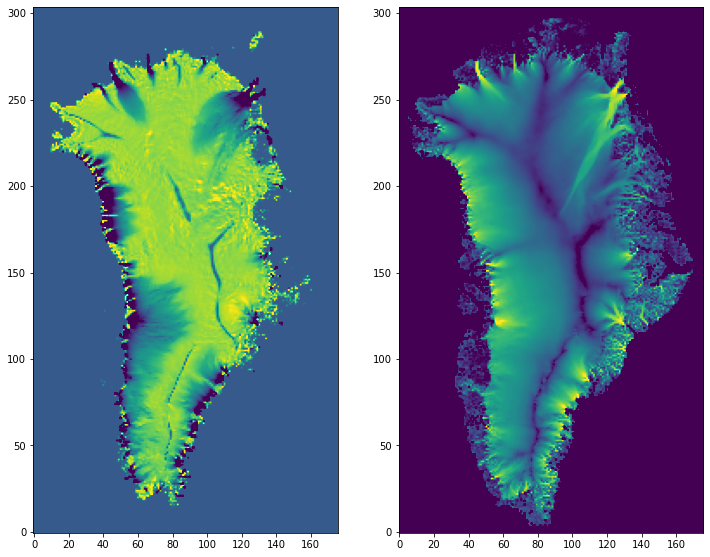

In [33]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(12,24)
model_index = 1
X_posterior = np.load(open('./posterior_samples_doug/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
axs[0].imshow((m(torch.tensor(X_posterior[1000],device=device),add_mean=True) - m(torch.tensor(X_posterior[0],device=device),add_mean=True)).detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=-0.1,vmax=0.1)
axs[1].imshow(np.log10(U_obs.detach().cpu().numpy().reshape((ny,nx))+1e-3),origin='lower',vmin=0,vmax=3)

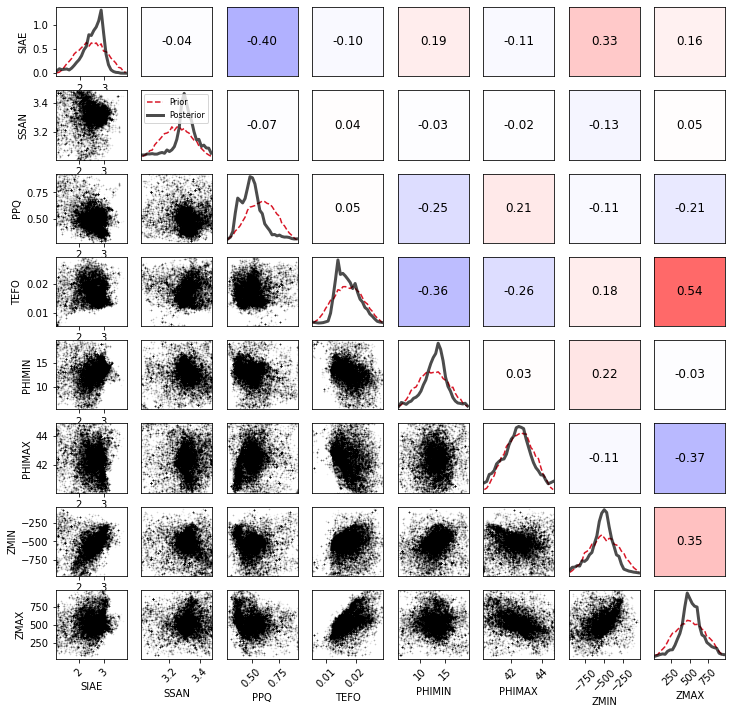

In [84]:
from matplotlib.ticker import NullFormatter,ScalarFormatter
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

del X_list, X_posterior
#X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
X_prior = X_prior*X_s.cpu().numpy() + X_m.cpu().numpy()

X_hat = X_prior

fig,axs = plt.subplots(nrows=8,ncols=8,figsize=(12,12))
X_list = []

for model_index in range(n_models):
    X_list.append(np.load(open('./posterior_samples_doug/X_posterior_model_{0:03d}.npy'.format(model_index),'rb')))
    
X_posterior = np.vstack(X_list)    
X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()

C_0 = np.corrcoef((X_posterior - X_posterior.mean(axis=0)).T)
Cn_0 = (np.sign(C_0)*C_0**2 + 1)/2.

color_post_0 = '#00B25F'
color_post_1 = '#132DD6'
color_prior = '#D81727'
color_ensemble = '#BA9B00'
color_other = '#20484E0'


for i in range(8):
    for j in range(8):
        if i>j:
            
            axs[i,j].scatter(X_posterior[:,j],X_posterior[:,i],c='k',s=0.5,alpha=0.05,label='Posterior',rasterized=True)
            min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
            max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
            bins_y = np.linspace(min_val,max_val,30)

            min_val = min(X_hat[:,j].min(),X_posterior[:,j].min())
            max_val = max(X_hat[:,j].max(),X_posterior[:,j].max())
            bins_x = np.linspace(min_val,max_val,30)
            
            #v = st.gaussian_kde(X_posterior[:,[j,i]].T)
            #bx = 0.5*(bins_x[1:] + bins_x[:-1])
            #by = 0.5*(bins_y[1:] + bins_y[:-1])
            #Bx,By = np.meshgrid(bx,by)
            
            #axs[i,j].contour(10**Bx,10**By,v(np.vstack((Bx.ravel(),By.ravel()))).reshape(Bx.shape),7,alpha=0.7,colors='black')

            axs[i,j].set_xlim(X_hat[:,j].min(),X_hat[:,j].max())
            axs[i,j].set_ylim(X_hat[:,i].min(),X_hat[:,i].max())

            #axs[i,j].set_xscale('log')
            #axs[i,j].set_yscale('log')

        elif i<j:
            patch_upper = Polygon(np.array([[0.,0.],[0.,1.],[1.,1.],[1.,0.]]),facecolor=plt.cm.seismic(Cn_0[i,j]))
            #patch_lower = Polygon(np.array([[0.,0.],[1.,0.],[1.,1.]]),facecolor=plt.cm.seismic(Cn_1[i,j]))
            axs[i,j].add_patch(patch_upper)
            #axs[i,j].add_patch(patch_lower)
            if C_0[i,j]>-0.5:
                color = 'black'
            else:
                color = 'white'
            axs[i,j].text(0.5,0.5,'{0:.2f}'.format(C_0[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)
            #if C_1[i,j]>-0.5:
            #    color = 'black'
            #else:
            #    color = 'white'

            #axs[i,j].text(0.75,0.25,'{0:.2f}'.format(C_1[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)

        elif i==j:
            min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
            max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
            bins = np.linspace(min_val,max_val,30)
            #X_hat_hist,b = np.histogram(X_hat[:,i],bins,density=True)
            X_prior_hist,b = np.histogram(X_prior[:,i],bins,density=True)
            X_posterior_hist = np.histogram(X_posterior[:,i],bins,density=True)[0]
            b = 0.5*(b[1:] + b[:-1])
            lw = 3.0
            axs[i,j].plot(b,X_prior_hist,color=color_prior,linewidth=0.5*lw,label='Prior',linestyle='dashed')
            
            axs[i,j].plot(b,X_posterior_hist,color='black',linewidth=lw,linestyle='solid',label='Posterior',alpha=0.7)

            #for X_ind in X_stack:
            #    X_hist,_ = np.histogram(X_ind[:,i],bins,density=False)
            #    X_hist=X_hist/len(X_posterior)
            #    X_hist=X_hist/(bins[1]-bins[0])
            #    axs[i,j].plot(10**b,X_hist,'b-',alpha=0.2,lw=0.5)

            if i==1:
                axs[i,j].legend(fontsize=8)
            axs[i,j].set_xlim(min_val,max_val)
            #axs[i,j].set_xscale('log')

        else:
            axs[i,j].remove()

keys=samples.keys()

for i,ax in enumerate(axs[:,0]):
    ax.set_ylabel(keys[i])

for j,ax in enumerate(axs[-1,:]):
    ax.set_xlabel(keys[j])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
    if j>0:
        ax.tick_params(axis='y',which='both',length=0)
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

for ax in axs[:-1,1:].ravel():
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.tick_params(axis='both',which='both',length=0)

fig.savefig('speed_emulator_posterior.pdf')

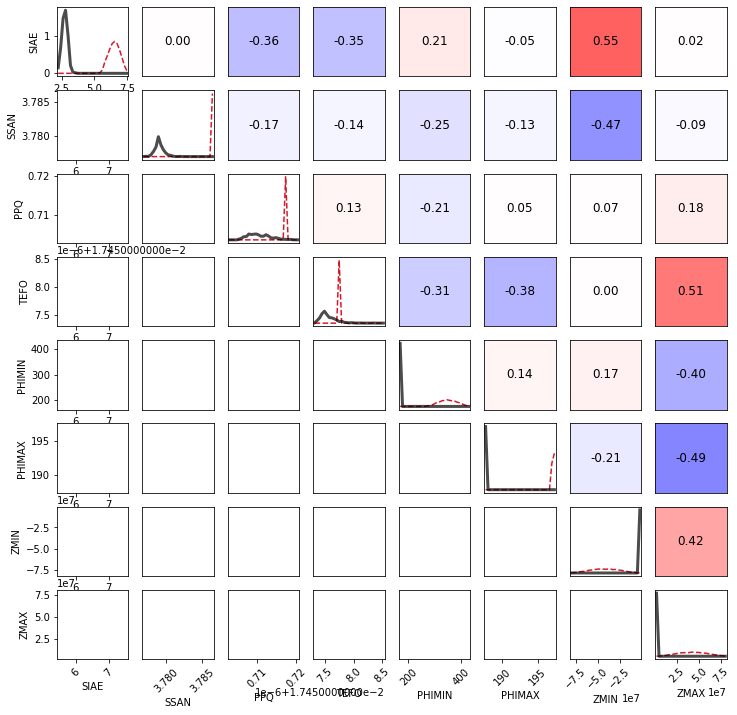

In [81]:
from matplotlib.ticker import NullFormatter,ScalarFormatter
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
#X_prior = X_prior*X_s.cpu().numpy() + X_m.cpu().numpy()

X_hat = X_prior

del fig, axs
fig,axs = plt.subplots(nrows=8,ncols=8,figsize=(12,12))
color_post_0 = '#00B25F'
color_post_1 = '#132DD6'
color_prior = '#D81727'
color_ensemble = '#BA9B00'
color_other = '#20484E0'


for model_index in range(1):
    X_posterior = np.load(open('./posterior_samples_doug/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
    X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()
    
    
    C_0 = np.corrcoef((X_posterior - X_posterior.mean(axis=0)).T)
    Cn_0 = (np.sign(C_0)*C_0**2 + 1)/2.

    for i in range(8):
        for j in range(8):
            if i>j:
            
                axs[i,j].scatter(X_posterior[:,j],X_posterior[:,i],c='k',s=0.5,alpha=0.05,label='Posterior',rasterized=True)
                min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
                max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
                bins_y = np.linspace(min_val,max_val,30)

                min_val = min(X_hat[:,j].min(),X_posterior[:,j].min())
                max_val = max(X_hat[:,j].max(),X_posterior[:,j].max())
                bins_x = np.linspace(min_val,max_val,30)

                axs[i,j].set_xlim(X_hat[:,j].min(),X_hat[:,j].max())
                axs[i,j].set_ylim(X_hat[:,i].min(),X_hat[:,i].max())

            elif i<j:
                patch_upper = Polygon(np.array([[0.,0.],[0.,1.],[1.,1.],[1.,0.]]),facecolor=plt.cm.seismic(Cn_0[i,j]))
             
                axs[i,j].add_patch(patch_upper)
            
                if C_0[i,j]>-0.5:
                    color = 'black'
                else:
                    color = 'white'
                axs[i,j].text(0.5,0.5,'{0:.2f}'.format(C_0[i,j]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=axs[i,j].transAxes,color=color)

            elif i==j:
                min_val = min(X_hat[:,i].min(),X_posterior[:,i].min())
                max_val = max(X_hat[:,i].max(),X_posterior[:,i].max())
                bins = np.linspace(min_val,max_val,30)
                #X_hat_hist,b = np.histogram(X_hat[:,i],bins,density=True)
                X_prior_hist,b = np.histogram(X_prior[:,i],bins,density=True)
                X_posterior_hist = np.histogram(X_posterior[:,i],bins,density=True)[0]
                b = 0.5*(b[1:] + b[:-1])
                lw = 3.0
                axs[i,j].plot(b,X_prior_hist,color=color_prior,linewidth=0.5*lw,label='Prior',linestyle='dashed')
            
                axs[i,j].plot(b,X_posterior_hist,color='black',linewidth=lw,linestyle='solid',label='Posterior',alpha=0.7)

                #if i==1:
                #    axs[i,j].legend(fontsize=8)
                axs[i,j].set_xlim(min_val,max_val)
            else:
                axs[i,j].remove()

keys=samples.keys()

for i,ax in enumerate(axs[:,0]):
    ax.set_ylabel(keys[i])

for j,ax in enumerate(axs[-1,:]):
    ax.set_xlabel(keys[j])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax.xaxis.get_minorticklabels(), rotation=45)
    if j>0:
        ax.tick_params(axis='y',which='both',length=0)
        ax.yaxis.set_minor_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())

for ax in axs[:-1,1:].ravel():
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.tick_params(axis='both',which='both',length=0)


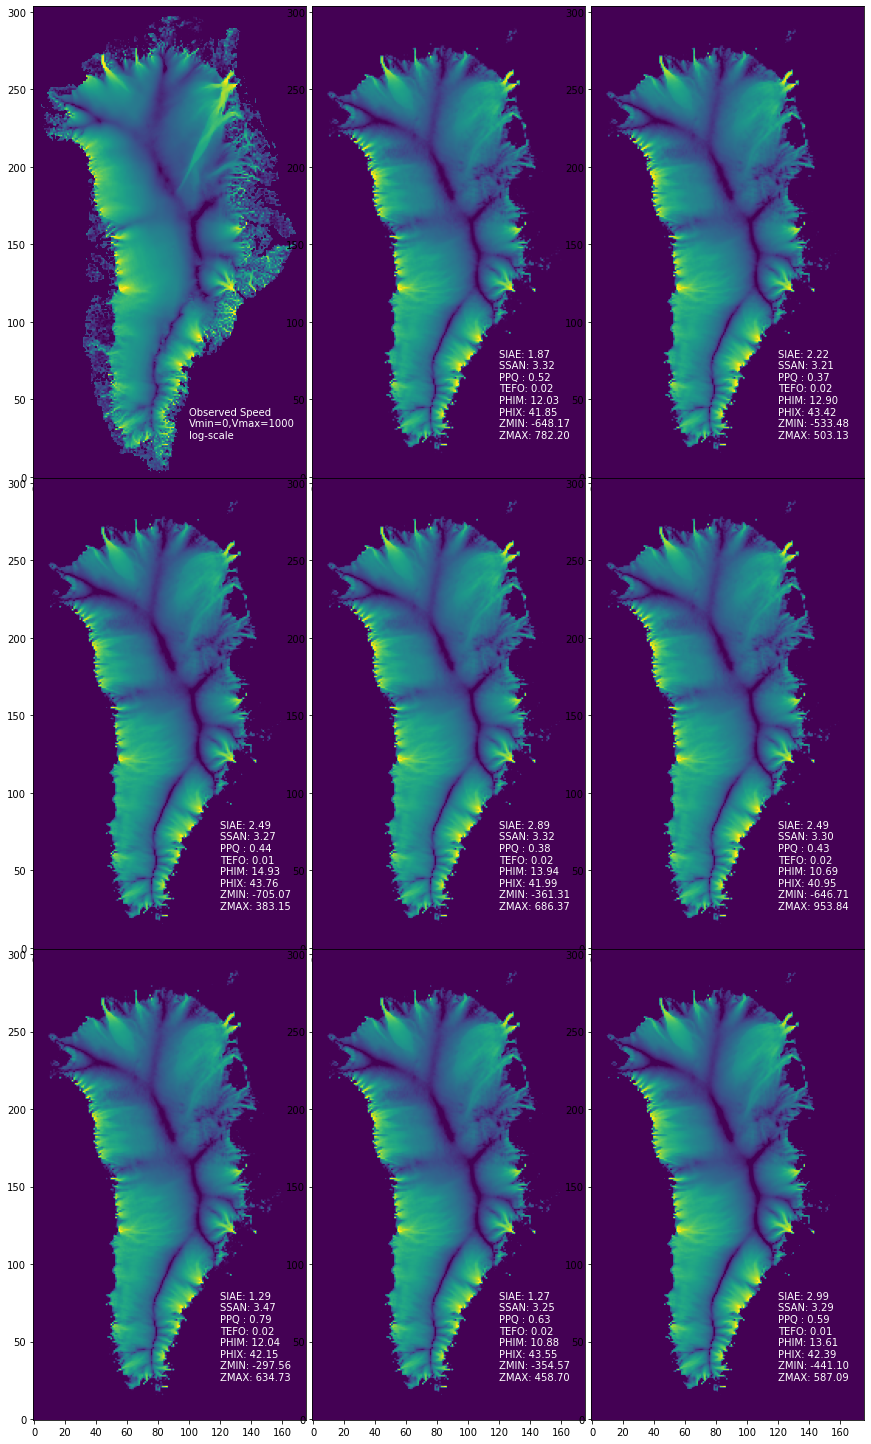

In [41]:
X_list = []

for model_index in range(n_models):
    X_list.append(np.load(open('./posterior_samples_doug/X_posterior_model_{0:03d}.npy'.format(model_index),'rb')))
    
X_posterior = np.vstack(X_list)    
X_posterior = X_posterior*X_s.cpu().numpy() + X_m.cpu().numpy()

fig,axs = plt.subplots(nrows=3,ncols=3,figsize=(15,26))
axs = axs.ravel()
axs[0].imshow(np.log10(U_obs.detach().cpu().numpy().reshape((ny,nx))+1e-3),origin='lower',vmin=0,vmax=3)
axs[0].text(100,25,'Observed Speed\nVmin=0,Vmax=1000\nlog-scale',c='white')
for ax in axs[1:]:
    model_index = np.random.randint(5)
    sample_index = np.random.randint(9000)
    m = models[model_index]
    
    X_p = np.load(open('./posterior_samples_doug/X_posterior_model_{0:03d}.npy'.format(model_index),'rb'))
    X_p_scaled = X_p*X_s.cpu().numpy() + X_m.cpu().numpy()   
    ax.imshow(m(torch.tensor(X_p[sample_index],device=device),add_mean=True).detach().cpu().numpy().reshape((ny,nx)),origin='lower',vmin=0,vmax=3)
    ax.text(120,25,'SIAE: {0:.2f}\nSSAN: {1:.2f}\nPPQ : {2:.2f}\nTEFO: {3:.2f}\nPHIM: {4:.2f}\nPHIX: {5:.2f}\nZMIN: {6:.2f}\nZMAX: {7:.2f}'.format(*X_p_scaled[sample_index]),c='white')
fig.subplots_adjust(wspace=0,hspace=0)
fig.savefig('emulator_speeds.pdf')

In [104]:
U_obs.detach().cpu().numpy().reshape((ny,nx)).shape

(304, 176)

In [ ]:
3000 * 95

TODO: Add plotting